This tutorial gives you an idea of Networkx and other useful libraries. Basically, it is composed of three different examples which involve loading graphs and data structures.

Before the start of writing any codes, it is important to load the approiate libraries with the following commands. Note that libraries loading must be placed at the top.

In [15]:
#pip install networkx
import sys

In [3]:
# Import networkx library and rename it as nx. 
import networkx as nx

# Adding support for large, multi-dimensional arrays and matrices.
import numpy as np

import matplotlib.pyplot as plt

# Part 1: File Input/output

### Example I: Loading an undirected graph from a data file and display the information. 

The data file is called "edgelist1.txt".

In [4]:
# Put the path of the folder that contains the data file. 
# As we put the data file in the same directory, "./" is good enough.
# You can also put a hard-coded link as well.
place_holder = './'

After getting the place-holder for the data file, we can construct the graph using the Networkx library.
The result will be printed on the screen and written to the file "edgelist1_out.txt".

In [5]:
# Create an empty graph structure with no nodes and no edges.
G0 = nx.Graph()
# Read an un-directed graph from a list of edges
G0 = nx.read_edgelist(place_holder + 'edgelist1.txt',
                      nodetype=str, data=[('weight', int)])



In [6]:
# check if read correctly, print the edge information
print("Printing G0")

# Print the graph information
print(G0.edges(data=True))



Printing G0
[('a', 'b', {'weight': 4}), ('a', 'd', {'weight': 4}), ('b', 'c', {'weight': 9}), ('b', 'e', {'weight': 1}), ('b', 'd', {'weight': 8}), ('c', 'd', {'weight': 4}), ('d', 'e', {'weight': 7})]


In [7]:
# write the graph information in an output file
nx.write_weighted_edgelist(G0, place_holder + "edgelist1_out.txt")

### Exercise I: Directed graph. 

We use the same file "edgelist1.txt". An edge from a to b with a weight W exists when a line "a b W" can be found in the file.

The result will also be printed on the screen and written to the file "edgelist2_out.txt".

In [8]:
G1 = nx.DiGraph()
# Read an directed graph from a list of edges, need to specify that using the parameter ‘create_using’
G1 = nx.read_edgelist(place_holder + "edgelist1.txt",
                      nodetype = str,
                      create_using = nx.DiGraph(),
                      data = [('weight', int)])

print("Printing G1")
print(G1.edges(data=True))
nx.write_weighted_edgelist(G1, place_holder + "edgelist2_out.txt")

Printing G1
[('a', 'b', {'weight': 4}), ('a', 'd', {'weight': 4}), ('b', 'a', {'weight': 4}), ('b', 'c', {'weight': 9}), ('b', 'e', {'weight': 1}), ('c', 'd', {'weight': 4}), ('d', 'b', {'weight': 8}), ('d', 'e', {'weight': 7})]


### Exercise II: Directed graph with weight on nodes. 

We use the same file as the input in this example. However, the weight information within the file refers to the weight on the edges. 

We hard code the weight for the nodes in this example.

In [10]:
G2 = nx.DiGraph()
# Read an directed graph from a list of edges

G2 = nx.read_edgelist(place_holder + "edgelist1.txt",
                      nodetype = str,
                      create_using = nx.DiGraph(),
                      data = (('weight', int),))


# Adding weight to certain nodes
G2.nodes['a']['weight'] = 3
G2.nodes['b']['weight'] = 2

print("Printing G3")
print(G2.edges(data=True))

# Printing extra information about the node info.
print(list(G2.nodes.data()))

Printing G3
[('a', 'b', {'weight': 4}), ('a', 'd', {'weight': 4}), ('b', 'a', {'weight': 4}), ('b', 'c', {'weight': 9}), ('b', 'e', {'weight': 1}), ('c', 'd', {'weight': 4}), ('d', 'b', {'weight': 8}), ('d', 'e', {'weight': 7})]
[('a', {'weight': 3}), ('b', {'weight': 2}), ('c', {}), ('d', {}), ('e', {})]


# Part 2: Matrix representation and visualization.

### Example I: Read an adjacency matrix from a file as an undirected graph. Then display the graph using the display subroutine. 

The file used in this example is 'adjmat1.txt'.

Printing G3
[(0, 2, {'weight': 1}), (0, 4, {'weight': 1}), (1, 2, {'weight': 1}), (1, 4, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (3, 4, {'weight': 1})]


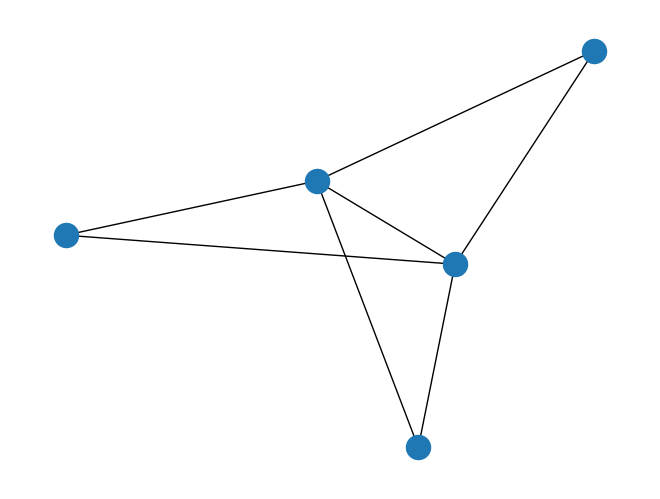

In [19]:
import numpy as np
import networkx as nx

# Read adjacency matrix
M3_txt = np.loadtxt(place_holder + 'adjmat1.txt')
M3 = np.array(M3_txt, dtype=int)  # Use np.array instead of np.matrix

# Convert to graph
G3 = nx.from_numpy_array(M3)

# Print edges
print("Printing G3")
print(G3.edges(data=True))

# Draw
nx.draw(G3)

In [ ]:
# Read the adjacency matrix from a file and store the weight using int
M3_txt = np.loadtxt(place_holder + 'adjmat1.txt')
M3 = np.matrix(M3_txt, dtype = int)

# convert the matrix into a graph
G3 = nx.from_numpy_matrix(M3)

# Print the graph information
print("Printing G3")
print(G3.edges(data=True))

# basic drawing function
nx.draw(G3)

In [20]:
# Display subroutine
def display(place_holder, nx_graph, nx_graph_str):

    plt.subplots(figsize=(5, 5))
    nx.draw_spring(nx_graph, with_labels = True, 
                   node_color='skyblue', node_size=200, \
                   edge_color='black')
    fig = plt.gcf()
    plt.show()
    fig.savefig(place_holder + nx_graph_str + '.jpg')

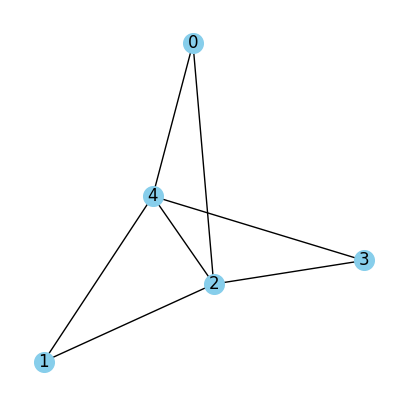

In [22]:
# Display using a visualization routine and write to disk as jpg
display(place_holder, G3, 'G3')

### Exercise I: Read an adjacency matrix from a file as a directed graph. 

The file used in this example is 'adjmat2.txt'.

Printing G4
[(0, 2, {'weight': 1}), (0, 4, {'weight': 1}), (1, 2, {'weight': 1}), (1, 4, {'weight': 1}), (2, 3, {'weight': 1}), (2, 4, {'weight': 1}), (3, 4, {'weight': 1}), (4, 3, {'weight': 1})]


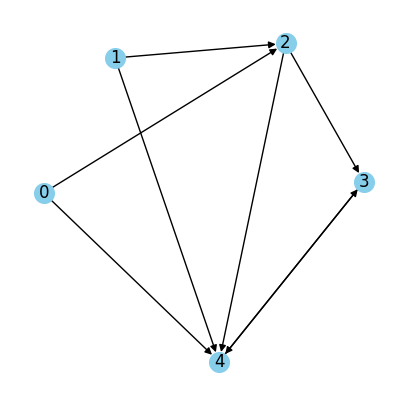

In [30]:
import numpy as np
import networkx as nx

M4_txt = np.loadtxt(place_holder + 'adjmat2.txt')
M4 = np.array(M4_txt, dtype=int)  # use np.array instead of np.matrix

G4 = nx.from_numpy_array(M4, create_using=nx.DiGraph())  # directed graph

print("Printing G4")
print(G4.edges(data=True))

display(place_holder, G4, 'G4')

In [ ]:
M4_txt = np.loadtxt(place_holder + 'adjmat2.txt')
M4 = np.matrix(M4_txt, dtype = int)

# convert the matrix into a graph
G4 = nx.from_numpy_matrix(M4, create_using = nx.DiGraph())

# Print the graph information
print("Printing G4")
print(G4.edges(data=True))
display(place_holder, G4, 'G4')

### Exercise II: Change the visualization.

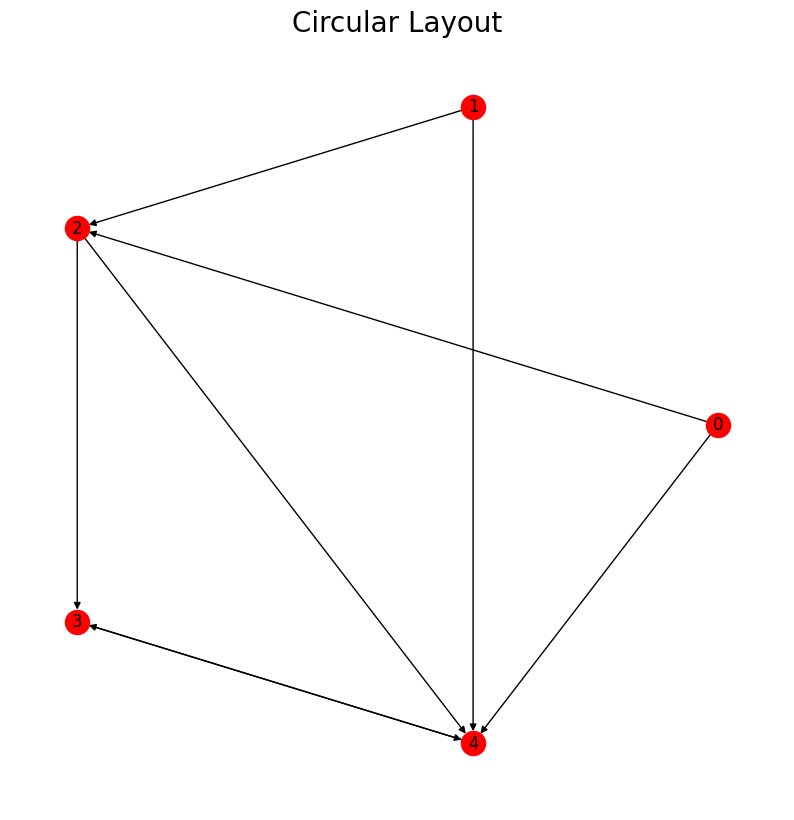

In [32]:
# Make the plot bigger
plt.subplots(figsize = (10, 10))

# draw a circular layout, get the nodes bigger and change the node color
nx.draw_circular(G4, with_labels = True, 
                 node_color = 'red', node_size = 300, \
               edge_color = 'black')
# add title
plt.title('Circular Layout',  fontsize = 20)
plt.show()


### Additional Exercise: Adjust the size of the nodes based on the outward degrees.

Assume that each node has at least one outgoing edge.

[2000, 2000, 2000, 1000, 1000]


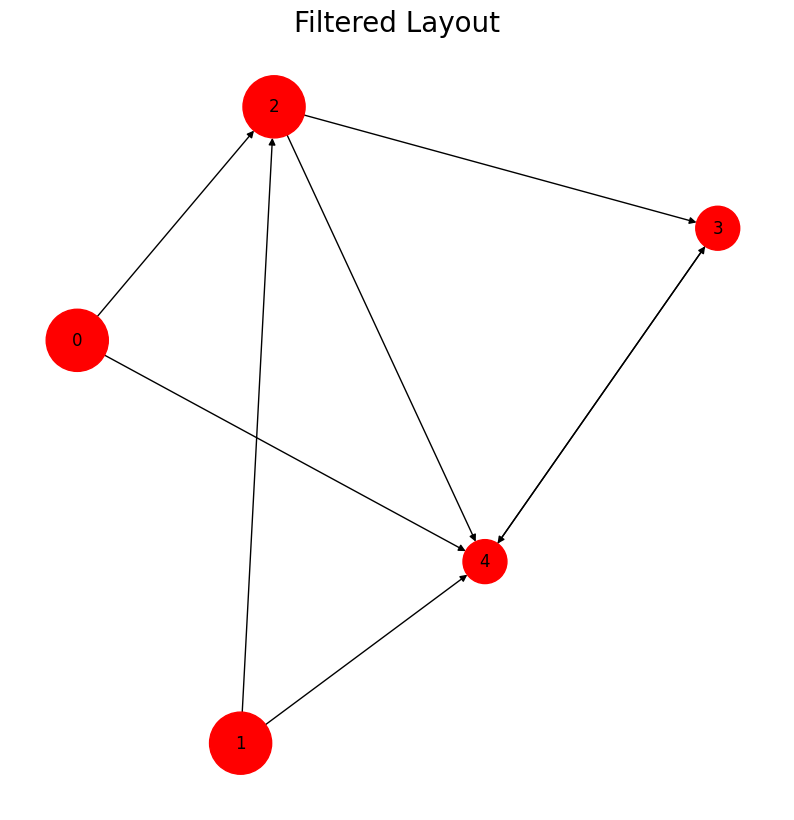

In [33]:
# get the outward degree for each node and store them as a list of (node_number, degree)
out_deg = G4.out_degree()

# Multiply the node degree to 1000 as the node size 
out_deg = [int(out_deg[node])*1000 for node in G4.nodes()]

print(out_deg)

# create the plot and title
plt.subplots(figsize = (10, 10))
plt.title("Filtered Layout", fontsize = 20)

nx.draw(G4, with_labels = True, node_color = 'red',
        node_size = out_deg, edge_color = 'black')


# Other interesting commands

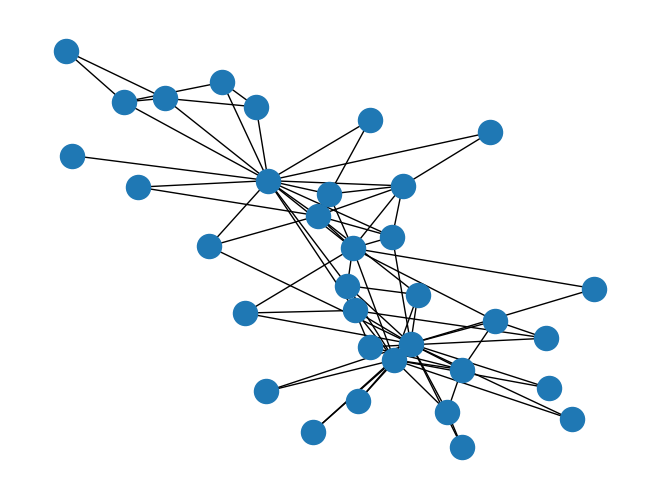

In [34]:
# construct inbuilt graphs

g = nx.karate_club_graph()
pos = nx.spring_layout(g)
nx.draw(g,pos)

In [35]:
for edge in g.edges:    
    source = edge[0]
    target = edge[1]
    weight = np.random.rand()*10
    g[source][target]['weight'] = weight
    g[source][target]['color'] = weight

  

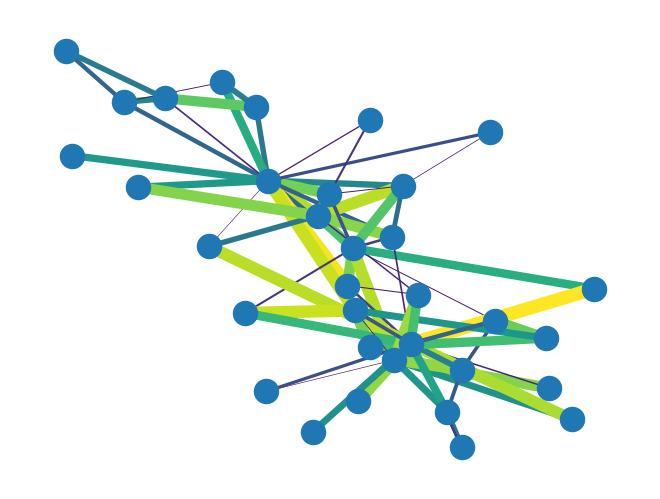

In [36]:
weights = [g[u][v]['weight'] for u,v in g.edges]
colors = [g[u][v]['color'] for u,v in g.edges]
nx.draw(g, pos, edge_color=colors, width=weights)